In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from math import pi
from pandas.plotting import parallel_coordinates
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.skew()

C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

In [7]:
df.kurtosis()

C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\615572439.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


is_canceled                         -1.712005
lead_time                            1.696449
arrival_date_year                   -0.994564
arrival_date_week_number            -0.986077
arrival_date_day_of_month           -1.187168
stays_in_weekend_nights              7.174066
stays_in_week_nights                24.284555
adults                            1352.115116
children                            18.673692
babies                            1633.948235
is_repeated_guest                   26.370077
previous_cancellations             674.073693
previous_bookings_not_canceled     767.245210
booking_changes                     79.393605
agent                               -0.007180
company                             -0.490795
days_in_waiting_list               186.793070
adr                               1013.189851
required_car_parking_spaces         29.998056
total_of_special_requests            1.492565
dtype: float64

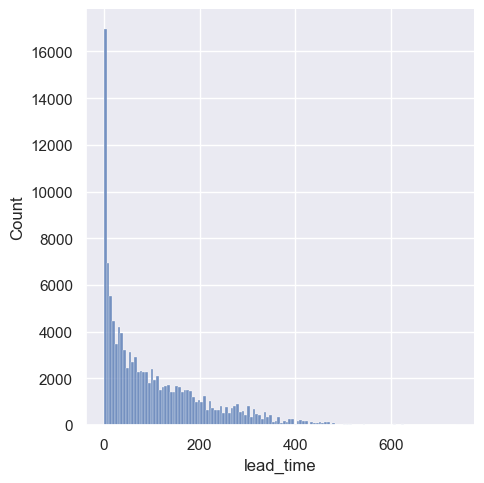

In [8]:
sns.displot(df['lead_time'])

<Axes: xlabel='hotel', ylabel='lead_time'>

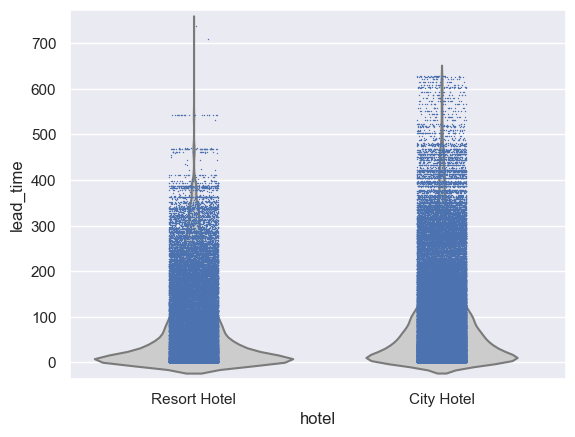

In [9]:
sns.violinplot(x="hotel", y="lead_time", data=df, inner=None, color="0.8")
sns.stripplot(x="hotel", y="lead_time", data=df, size=1)

In [10]:
df = pd.read_csv("datasets/wine-quality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


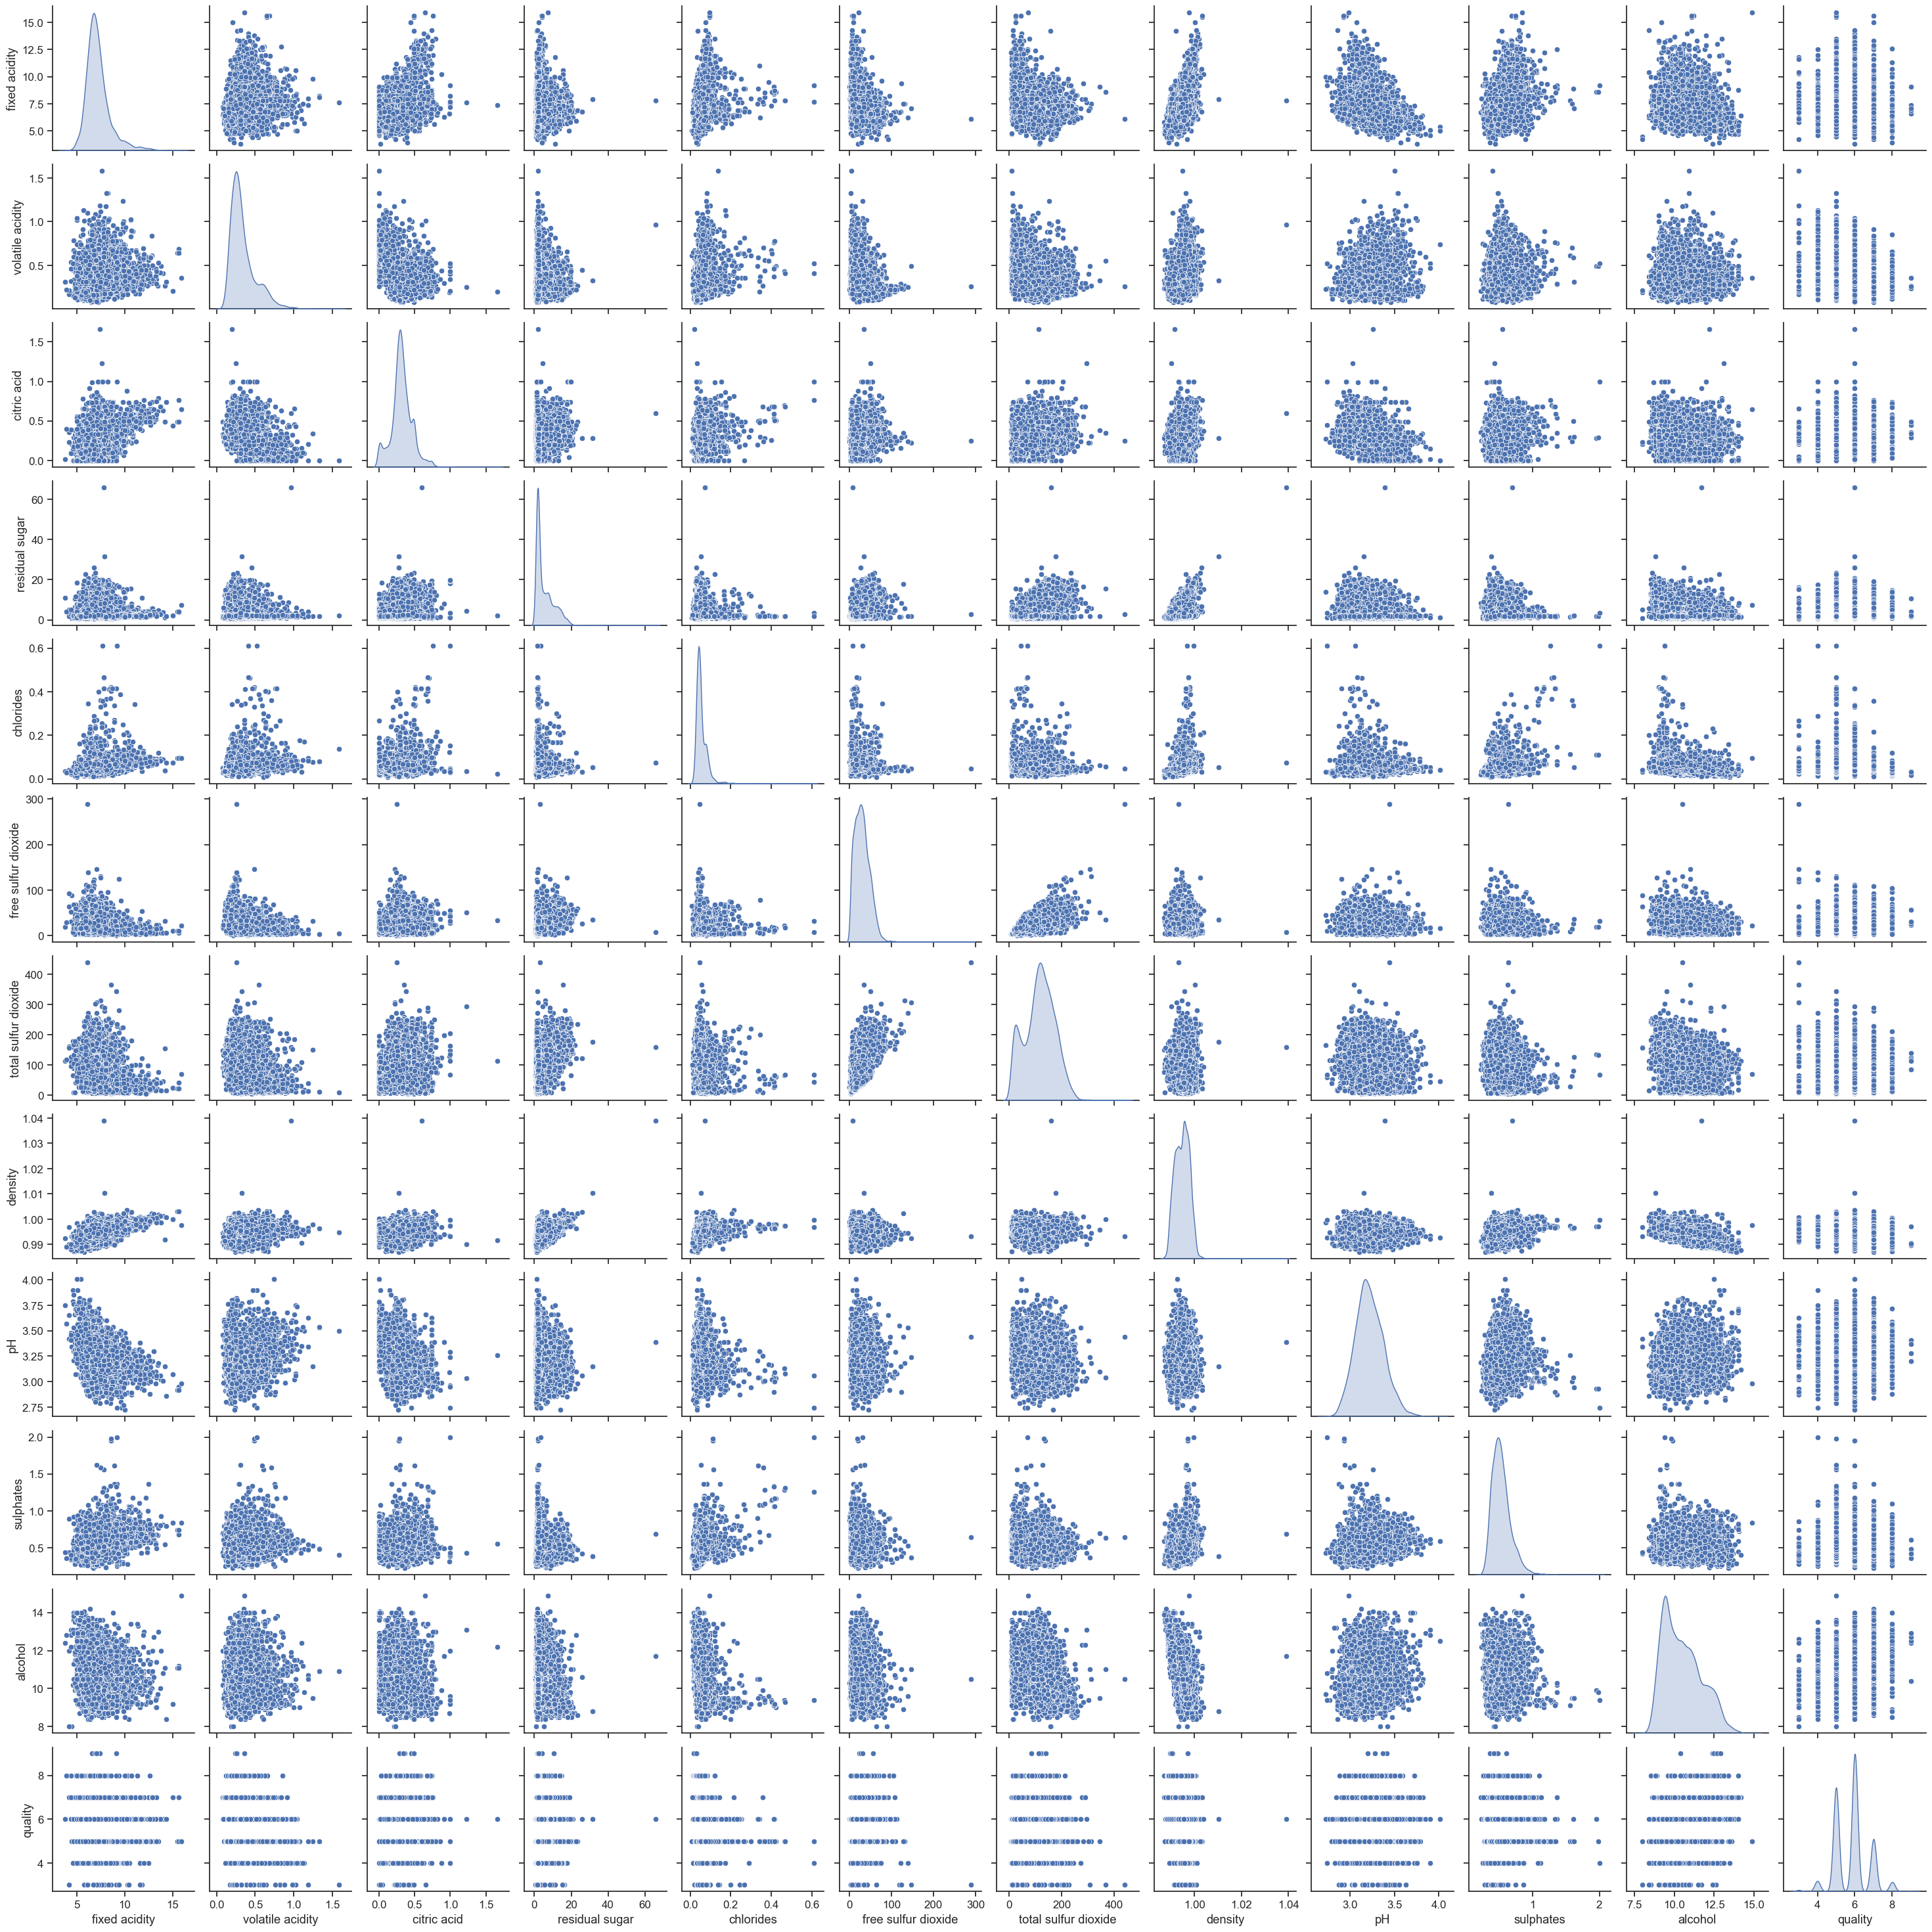

In [11]:
sns.set(font_scale=1.1)
sns.set_style('ticks')
sns.pairplot(df, diag_kind='kde')
plt.show()

In [12]:
df.cov()

C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.681560,0.047012,0.060971,-0.693045,0.013564,-6.524162,-24.162531,0.001786,-0.052524,0.057990,-0.147911,-0.087224
volatile acidity,0.047012,0.027109,-0.009043,-0.154122,0.002177,-1.032411,-3.861743,0.000134,0.006898,0.005526,-0.007509,-0.038246
citric acid,0.060971,-0.009043,0.021102,0.098498,0.000200,0.344101,1.602662,0.000042,-0.007675,0.001245,-0.001808,0.010874
residual sugar,-0.693045,-0.154122,0.098498,22.639751,-0.021493,34.060547,133.334227,0.007884,-0.204174,-0.131562,-2.041388,-0.153011
chlorides,0.013564,0.002177,0.000200,-0.021493,0.001228,-0.121269,-0.553673,0.000038,0.000252,0.002061,-0.010735,-0.006145
free sulfur dioxide,-6.524162,-1.032411,0.344101,34.060547,-0.121269,315.041192,723.261972,0.001369,-0.414329,-0.497973,-3.807165,0.859664
total sulfur dioxide,-24.162531,-3.861743,1.602662,133.334227,-0.553673,723.261972,3194.720039,0.005491,-2.159577,-2.316258,-17.914646,-2.042704
density,0.001786,0.000134,0.000042,0.007884,0.000038,0.001369,0.005491,0.000009,0.000006,0.000116,-0.002456,-0.000801
pH,-0.052524,0.006898,-0.007675,-0.204174,0.000252,-0.414329,-2.159577,0.000006,0.025840,0.004575,0.023203,0.002719
sulphates,0.057990,0.005526,0.001245,-0.131562,0.002061,-0.497973,-2.316258,0.000116,0.004575,0.022146,-0.000579,0.005032


In [13]:
df.corr(method='pearson')

C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\2047318543.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis')


<Axes: >

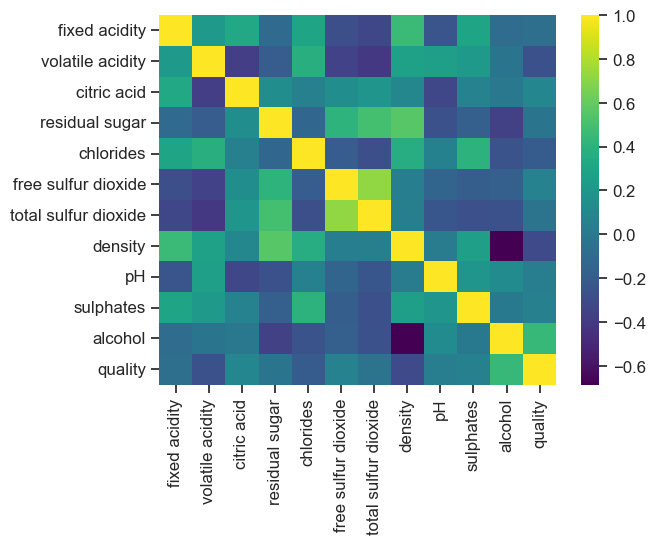

In [14]:
sns.heatmap(df.corr(), cmap='viridis')

C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\2504848596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)


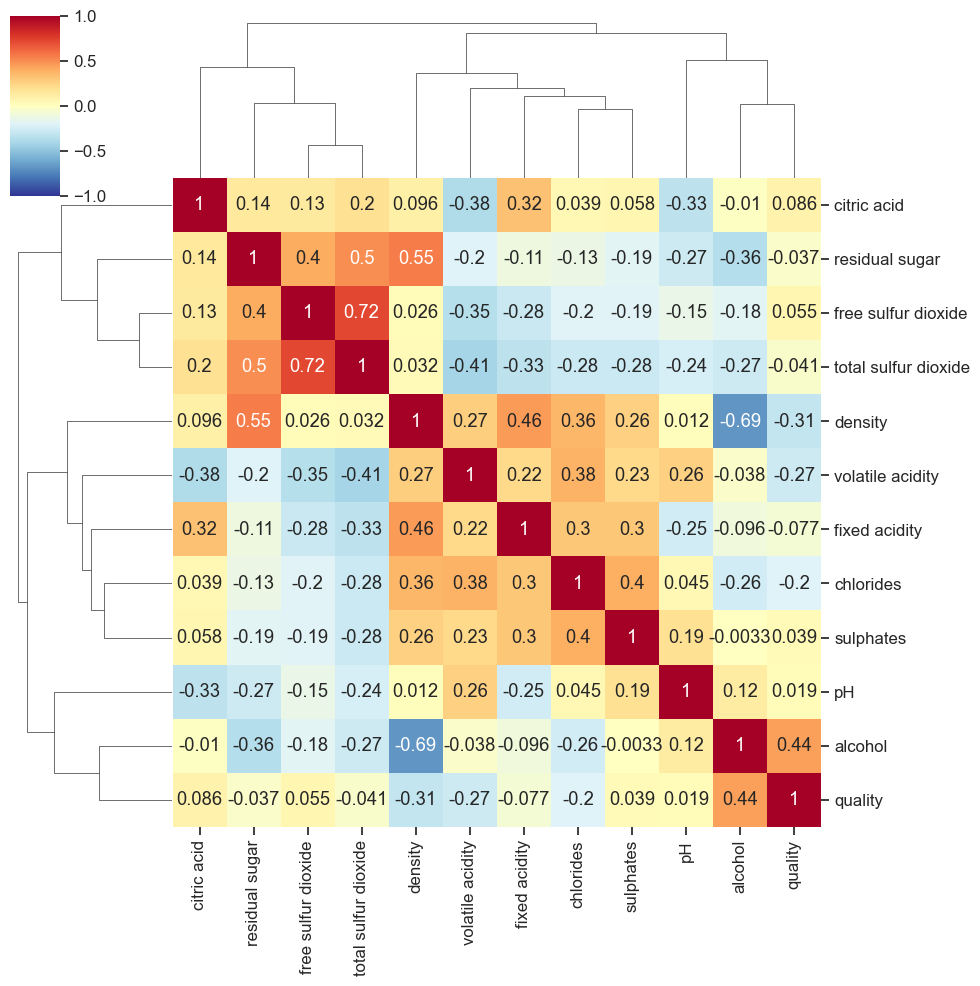

In [15]:
sns.clustermap(df.corr(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)

C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\4061179810.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.triu(np.ones_like(df.corr()))
C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\4061179810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\4061179810.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1

Text(0.5, 1.0, 'Wine Quality Correlation')

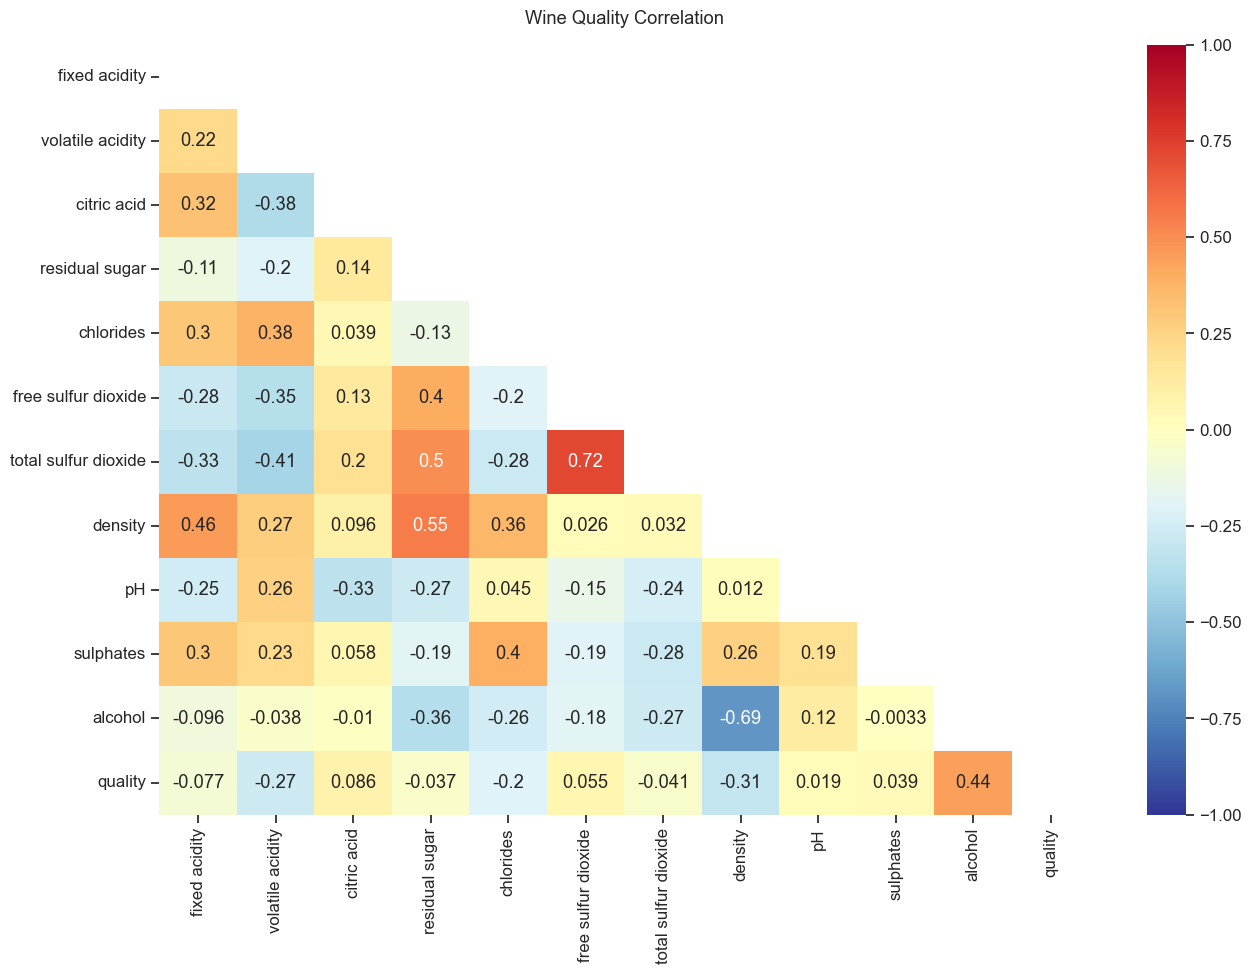

In [16]:
np.triu(np.ones_like(df.corr()))
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

fig,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlBu_r", cbar=True)
ax.set_title('Wine Quality Correlation', pad=15)

In [17]:
df = pd.read_csv("datasets/superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [18]:
df['Date2'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
df = df.sort_values(by='Date2')
df['year'] = df['Date2'].dt.year
df_line = df[df.year == 2018]
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()
df_line.head()

C:\Users\junkyu\AppData\Local\Temp\ipykernel_13536\2502341162.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date2'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)


,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-04,5972.988
2,2018-01-05,4108.370
3,2018-01-06,586.042
4,2018-01-07,639.830


<Axes: xlabel='Date2'>

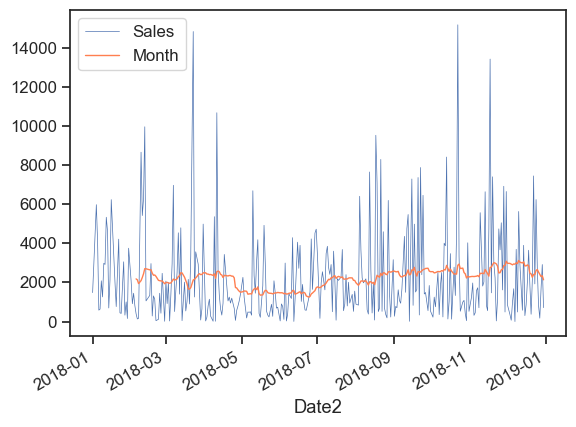

In [19]:
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()
ax = df_line.plot(x='Date2', y='Sales', linewidth="0.5")
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth="1", ax=ax)

In [20]:
df_bar_1 = df.groupby('year')['Sales'].sum().reset_index()
df_bar_1.head()

,year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


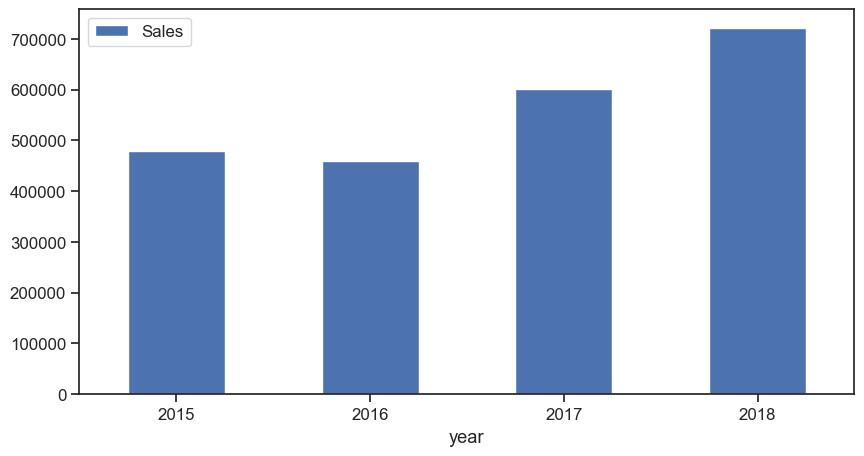

In [21]:
ax = df_bar_1.plot.bar(x='year', y='Sales', rot=0, figsize=(10, 5))

In [22]:
df_bar_2 = df.groupby(['year', 'Segment'])['Sales'].sum().reset_index()
df_bar_2_pv = df_bar_2.pivot(index='year', columns='Segment', values='Sales').reset_index()
df_bar_2_pv.head()

Segment,year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<Axes: xlabel='year'>

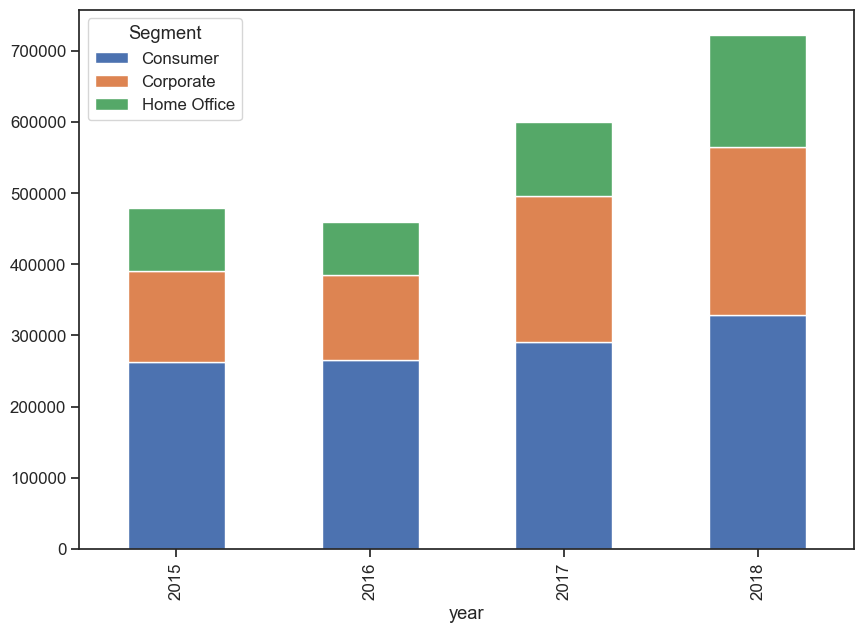

In [23]:
df_bar_2_pv.plot.bar(x='year', stacked=True, figsize=(10,7))